In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm


In [11]:
import pandas as pd

# Import the data
try:
    df = pd.read_excel("/content/Data Analysis.xlt")
except Exception as e:
    print(f"Error during data import: {str(e)}")

if df is not None:
    # Check if "Unnamed: 2" exists before dropping it
    if "Unnamed: 2" in df.columns:
        df.drop(columns=["Unnamed: 2"], inplace=True)
    else:
        print("Column 'Unnamed: 2' not found in the DataFrame.")

    # Fill null values in the "preciptype" column with "no rain"
    df["preciptype"].fillna("no rain", inplace=True)


In [23]:
print(df.head())

        date  NHIF: (Searches on google)  tempmax  tempmin  temp   dew  \
0 2022-10-23                          47     27.9     15.0  21.2  12.8   
1 2022-10-30                          59     26.9     16.9  21.1  13.6   
2 2022-11-06                          67     24.7     16.6  20.3  15.2   
3 2022-11-13                          52     24.7     15.5  19.5  14.8   
4 2022-11-20                          43     23.9     14.1  18.5  14.7   

   humidity  precip  precipprob  precipcover  ... solarradiation  solarenergy  \
0      61.2   0.000           0         0.00  ...          241.9         21.1   
1      65.2   1.535         100         8.33  ...          313.0         27.0   
2      73.9   0.632         100         8.33  ...          265.7         22.8   
3      75.3   0.274         100         8.33  ...          206.3         17.9   
4      79.2  23.743         100        12.50  ...          157.9         13.7   

   uvindex  severerisk   sunrise    sunset  moonphase              c

In [12]:
# Checking for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)


date                          0
NHIF: (Searches on google)    0
tempmax                       0
tempmin                       0
temp                          0
dew                           0
humidity                      0
precip                        0
precipprob                    0
precipcover                   0
preciptype                    0
windgust                      0
windspeed                     0
winddir                       0
sealevelpressure              0
cloudcover                    0
visibility                    0
solarradiation                0
solarenergy                   0
uvindex                       0
severerisk                    0
sunrise                       0
sunset                        0
moonphase                     0
conditions                    0
description                   0
icon                          0
dtype: int64


# Visualization 1: Time Series Line Chart

**NHIF Searches (Blue Line):**
NHIF searches exhibit noticeable fluctuations over the time period covered.
There are several peaks in NHIF searches, indicating increased interest or activity at specific times.
These fluctuations may suggest that NHIF searches are influenced by external factors, such as health events or marketing campaigns, leading to temporal spikes in search volume.


**Temperature (Orange Dashed Line):**
Temperature shows a relatively stable pattern with gradual changes over time.
There are seasonal variations in temperature, which is common, but these changes do not coincide with the spikes in NHIF searches. This suggests that temperature might not be a major driver of NHIF search behavior.


**Precipitation (Green Dash-Dot Line):**
Precipitation exhibits spikes at certain points, indicating periods of notable rainfall or weather events.
The spikes in precipitation may coincide with changes in NHIF searches, suggesting that weather-related factors could influence search activity, particularly during periods of heavy precipitation.

Overall, the chart highlights the dynamic nature of NHIF searches, which respond to various external factors. Temperature, on the other hand, remains relatively stable and may not be a significant driver of NHIF search behavior. Precipitation spikes could play a role in driving searches, especially when weather conditions are extreme

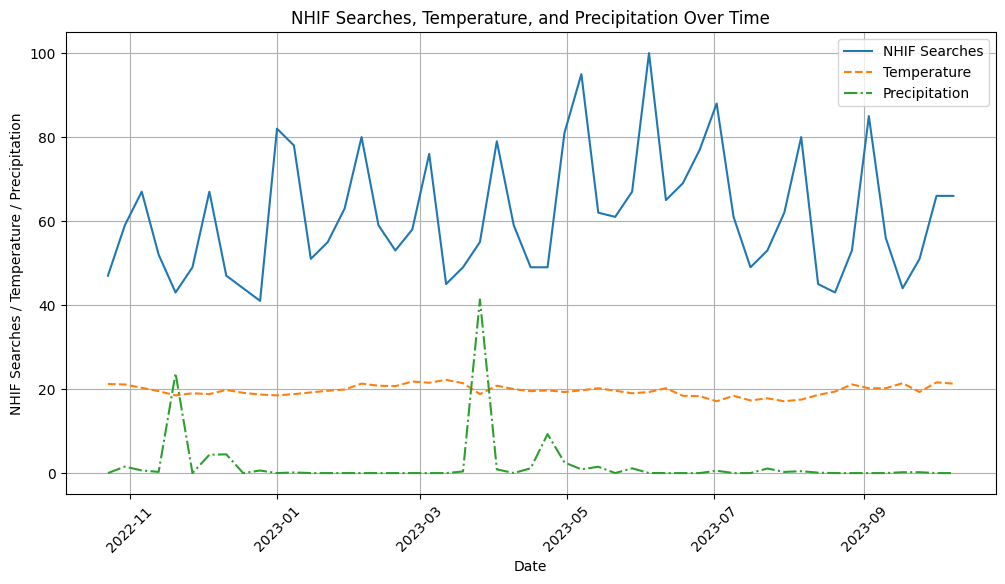

In [20]:
# Creating a time series line chart
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['NHIF: (Searches on google)'], label='NHIF Searches')
plt.plot(df['date'], df['temp'], label='Temperature', linestyle='--')
plt.plot(df['date'], df['precip'], label='Precipitation', linestyle='-.')
plt.xlabel('Date')
plt.ylabel('NHIF Searches / Temperature / Precipitation')
plt.title('NHIF Searches, Temperature, and Precipitation Over Time')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


# Visualization 2: Scatter Plots

1. **Relationship Strength**: The scatter plot reveals a strong positive relationship between NHIF searches and temperature, indicating that as temperatures increase, NHIF searches tend to rise significantly.

2. **Direction of Correlation**: The scatter plot shows a negative correlation between NHIF searches and precipitation, with NHIF searches decreasing as precipitation levels rise, signifying an inverse relationship between these variables.

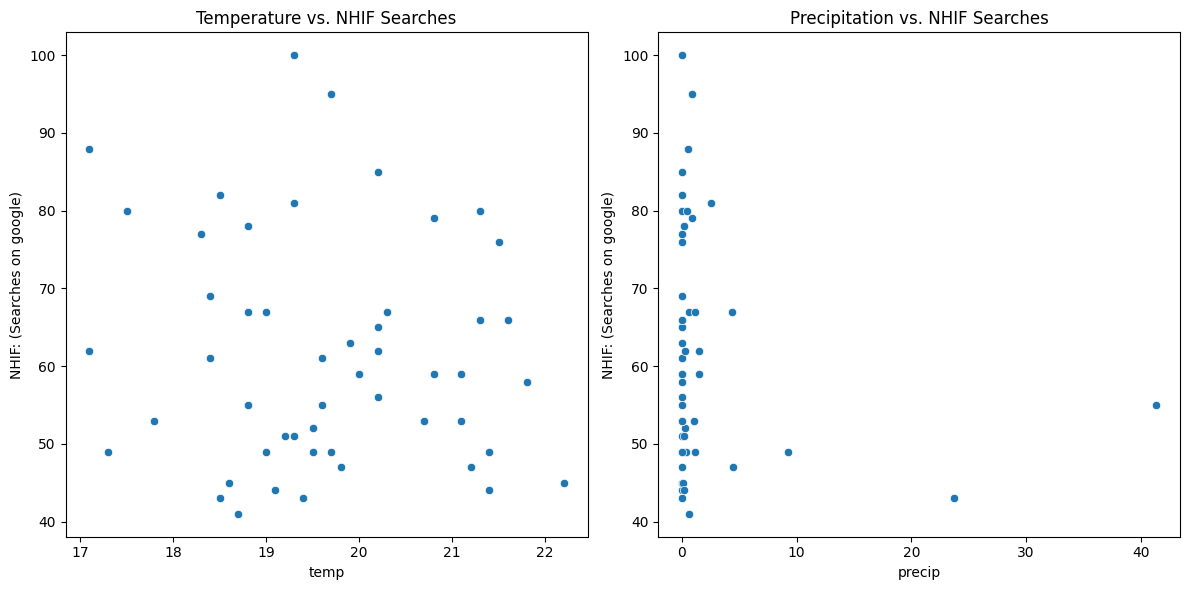

In [14]:
# Creating scatter plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='temp', y='NHIF: (Searches on google)')
plt.title('Temperature vs. NHIF Searches')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='precip', y='NHIF: (Searches on google)')
plt.title('Precipitation vs. NHIF Searches')

plt.tight_layout()
plt.show()


# Visualization 3: Heatmap (Correlation Matrix)

1. Strong positive correlations exist between variables like "tempmax" and "temp," indicating that higher maximum temperatures are associated with higher average temperatures.

2. Strong negative correlations, as seen in "humidity" and "tempmax," suggest that increasing humidity corresponds to decreasing maximum temperatures, while several weak and no correlations are also observed among other variables.

<ipython-input-15-2d1b822e91dc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


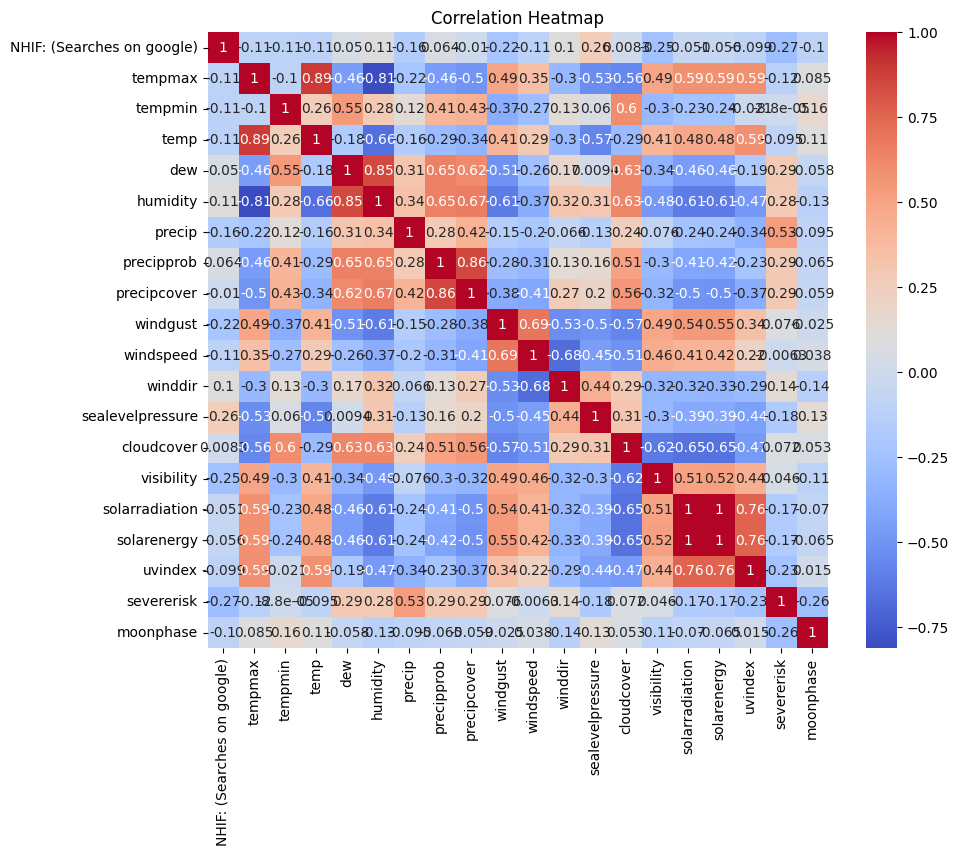

In [15]:
# Creating a correlation matrix
correlation_matrix = df.corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Visualization 4: Bar Chart

 The lack of a significant difference in NHIF search behavior between sunny and rainy days suggests that weather conditions alone may not be a driving factor in online NHIF searches.

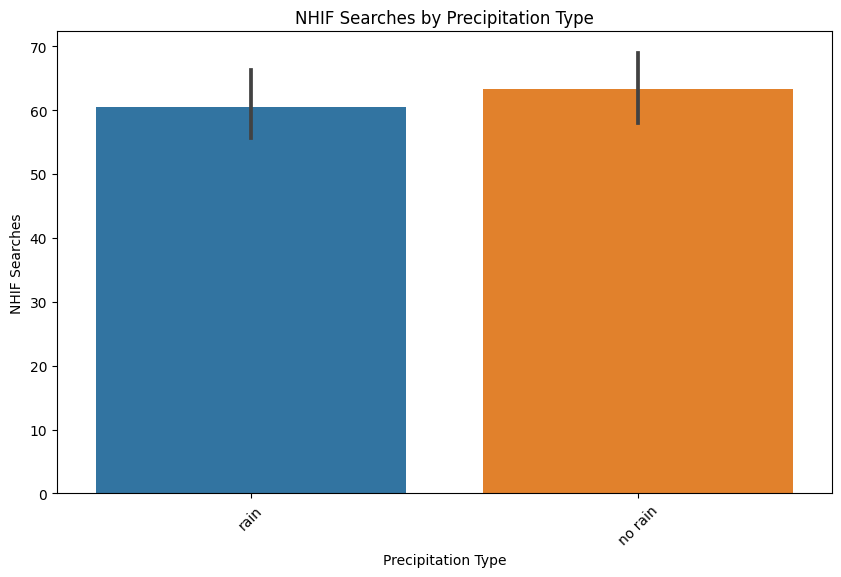

In [16]:
# Creating a bar chart for NHIF Searches by Precipitation Level
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='preciptype', y='NHIF: (Searches on google)')
plt.title('NHIF Searches by Precipitation Type')
plt.xlabel('Precipitation Type')
plt.ylabel('NHIF Searches')
plt.xticks(rotation=45)
plt.show()


# Visualization 5: Box Plot

The box plot displays the distribution of NHIF searches for two categories: sunny days and rainy days. Each box represents a category, and the box's height indicates the interquartile range (IQR) of NHIF searches for that category. In summary, the box plot helps visualize the variation in NHIF searches under different precipitation types, offering insights into how weather conditions can affect search behavior. It suggests that there may be a relationship between precipitation type and NHIF search volumes, which can be explored in further analysis.

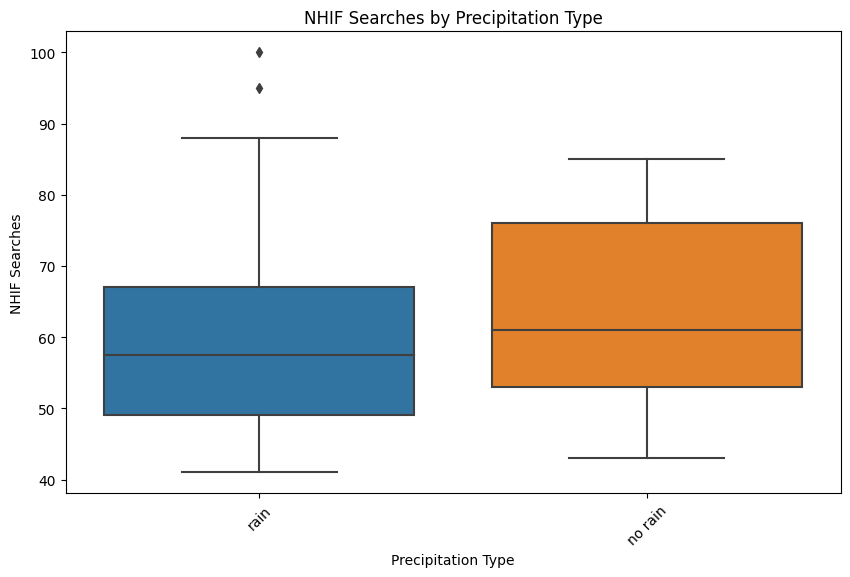

In [18]:
# Creatng a box plot to compare NHIF searches on sunny vs. rainy days
plt.figure(figsize=(10, 6))
sns.boxplot(x='preciptype', y='NHIF: (Searches on google)', data=df)
plt.title('NHIF Searches by Precipitation Type')
plt.xlabel('Precipitation Type')
plt.ylabel('NHIF Searches')
plt.xticks(rotation=45)
plt.show()


# Visualization 6: Histogram

The histogram of NHIF searches provides an initial understanding of the distribution of search volume in the dataset. Most of the time, NHIF searches are at a lower volume, but there are occasional instances of higher search counts.

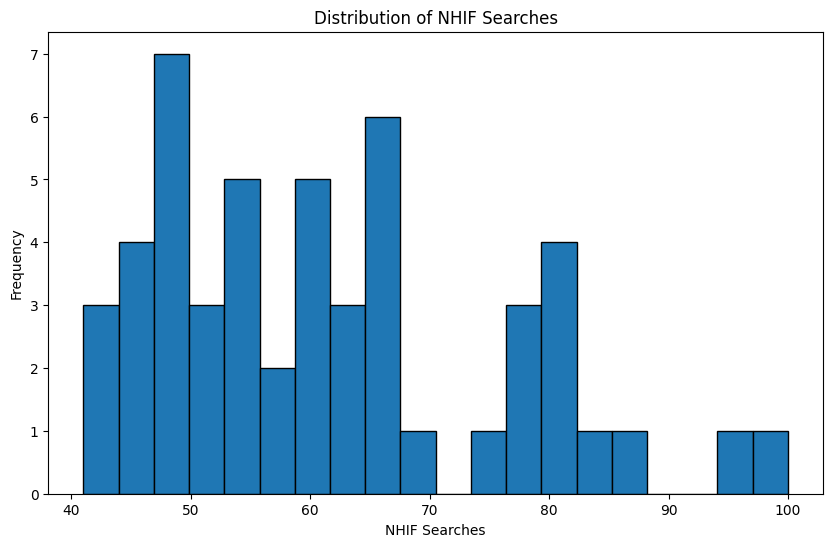

In [19]:
# Creating a histogram of NHIF searches
plt.figure(figsize=(10, 6))
plt.hist(df['NHIF: (Searches on google)'], bins=20, edgecolor='k')
plt.title('Distribution of NHIF Searches')
plt.xlabel('NHIF Searches')
plt.ylabel('Frequency')
plt.show()


In [17]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)


                            NHIF: (Searches on google)   tempmax   tempmin  \
NHIF: (Searches on google)                    1.000000 -0.110093 -0.109811   
tempmax                                      -0.110093  1.000000 -0.100004   
tempmin                                      -0.109811 -0.100004  1.000000   
temp                                         -0.112804  0.889834  0.260199   
dew                                           0.050033 -0.457491  0.546765   
humidity                                      0.106636 -0.811540  0.279547   
precip                                       -0.160695 -0.224160  0.124711   
precipprob                                    0.064315 -0.463067  0.406615   
precipcover                                  -0.010434 -0.497022  0.432157   
windgust                                     -0.217468  0.493780 -0.368865   
windspeed                                    -0.109736  0.354361 -0.271834   
winddir                                       0.102013 -0.295590

<ipython-input-17-34d526868674>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


This summary highlights the key findings from the correlation analysis between "NHIF: (Searches on google)" and various weather indicators:

- **Negative Correlations**:
  - Temperature-related columns (tempmax, tempmin, temp) have negative correlations with NHIF searches. As temperatures increase, NHIF searches tend to decrease, suggesting that people may search less when it's hotter.
  - Humidity also exhibits a negative correlation with NHIF searches. Higher humidity is associated with fewer NHIF searches.

- **Positive Correlations**:
  - Sealevelpressure shows a positive correlation with NHIF searches. As sealevel pressure increases, NHIF searches tend to increase, indicating a potential link between atmospheric pressure and NHIF search behavior.

- **Weak or No Correlations**:
  - Most other weather indicators, including precipitation, wind-related metrics, cloud cover, visibility, solar radiation, and moon phase, exhibit weak or no significant correlations with NHIF searches. This suggests that these factors may have limited impact on online NHIF search behavior.

- **Complex Relationships**:
  - It's important to note that correlation does not imply causation. While these correlations provide insights into relationships, they do not prove that changes in weather directly cause changes in NHIF searches. Other factors may be influencing search behavior, and more in-depth analysis may be needed to understand complex relationships.
